<h1><center>Python Programming for Data Science Project</center></h1>
<h2><center>Provider: Mansour Movahhedinia</center></h2>

--------------------------------------------------------

- Setting options and importing the required packeges.

In [221]:
%matplotlib inline

import pandas as pd
import re
import matplotlib.pyplot as plt
from itertools import zip_longest as zl

--------------------------------------------------------

# Q1

### a)

- Reading the <i>Energy Indicators.xls</i> file.  
- Ommiting the header by skipping rows 0 to 18.  
- Sending the list of column labels in the name argument.  
- Ommiting the footer by skipping 38 rows.  
- Replacing "..." with NA to indicate missing value.  
- Sending the columns to be read as a list in the usecols argument.  
- At the end, printing the last three rows.

In [222]:
energy = pd.read_excel("Energy Indicators.xls", skiprows = range(18),
                       names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
                       skipfooter = 38, na_values = '...', usecols = [2,3,4,5])
energy.tail(3)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Albania,102.0,35.0,100.000000
1,Algeria,1959.0,51.0,0.551010
2,American Samoa,NaN,NaN,0.641026
3,Andorra,9.0,121.0,88.695650
4,Angola,642.0,27.0,70.909090
5,Anguilla,2.0,136.0,0.000000
6,Antigua and Barbuda,8.0,84.0,0.000000
7,Argentina,3378.0,79.0,24.064520
8,Armenia,143.0,48.0,28.236060
9,Aruba,12.0,120.0,14.870690


### b)

- Converting megajouls to gigajouls by multiplying the values of the column <i>Energy Supply</i> by 1000000 and placing back in <i>Energy Supply</i>.  
- Printing the last three rows.

In [223]:
energy['Energy Supply'] *= 1000000
energy.tail(3)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
223,Yemen,344000000.0,13.0,0.00000
224,Zambia,400000000.0,26.0,99.71467
225,Zimbabwe,480000000.0,32.0,52.53612


### C)

- Finding the observations containing the required country names to insure the similarity of the given names to the ones in the dataframe.  

In [224]:
print(energy[energy['Country'].str.contains("Republic of Korea")], '\n')
print(energy[energy['Country'].str.contains("United States of America")], '\n')
print(energy[energy['Country'].str.contains("United Kingdom of Great Britain and Northern Ireland")], '\n')
print(energy[energy['Country'].str.contains("China, Hong Kong Special Administrative Region")], '\n')


                                   Country  Energy Supply  \
55   Democratic People's Republic of Korea   6.120000e+08   
163                      Republic of Korea   1.100700e+10   

     Energy Supply per Capita  % Renewable  
55                       25.0    70.180290  
163                     221.0     2.279353   

                        Country  Energy Supply  Energy Supply per Capita  \
215  United States of America20   9.083800e+10                     286.0   

     % Renewable  
215     11.57098   

                                               Country  Energy Supply  \
213  United Kingdom of Great Britain and Northern I...   7.920000e+09   

     Energy Supply per Capita  % Renewable  
213                     124.0     10.60047   

                                            Country  Energy Supply  \
42  China, Hong Kong Special Administrative Region3    585000000.0   

    Energy Supply per Capita  % Renewable  
42                      82.0          0.0   



- Replacing the wrong form of country names with correct ones.

In [225]:
energy = energy.replace(["Republic of Korea", "United States of America20",
                         "United Kingdom of Great Britain and Northern Ireland19",
                         "China, Hong Kong Special Administrative Region3"],
                        ["South Korea", "United States", "United Kingdom", "Hong Kong"])

- Creating a regular expression pattern to find the contents within paratheses.  
- Replacing the contents within prantheses with nothing. Thus, removing them.

In [226]:
pattern = re.compile(" \(.*\)$")
energy = energy.replace(pattern, "")

- Checking the result of the replacement above.

In [227]:
print(energy.loc[energy['Country'] == "Bolivia"], "\n")
print(energy.loc[energy['Country'] == "Falkland Islands"], "\n")
print(energy.loc[energy['Country'] == "Iran"], "\n")
print(energy.loc[energy['Country'] == "Micronesia"], "\n")
print(energy.loc[energy['Country'] == "Sint Maarten"], "\n")
print(energy.loc[energy['Country'] == "Venezuela"], "\n")

    Country  Energy Supply  Energy Supply per Capita  % Renewable
23  Bolivia    336000000.0                      32.0     31.47712 

             Country  Energy Supply  Energy Supply per Capita  % Renewable
69  Falkland Islands      1000000.0                     258.0     33.33333 

   Country  Energy Supply  Energy Supply per Capita  % Renewable
97    Iran   9.172000e+09                     119.0     5.707721 

        Country  Energy Supply  Energy Supply per Capita  % Renewable
132  Micronesia      2000000.0                      21.0     2.941176 

          Country  Energy Supply  Energy Supply per Capita  % Renewable
182  Sint Maarten     12000000.0                     327.0          0.0 

       Country  Energy Supply  Energy Supply per Capita  % Renewable
220  Venezuela   2.871000e+09                      95.0     67.83452 



### D

- Reading the file <i>world_bank.csv</i>.  
- Setting empty values as na values.  
- Setting the forth row as the ehader row and skipping rows 1, 2, and 3.

In [228]:
GDP = pd.read_csv("world_bank.csv", na_values='', header = 4)
GDP.tail(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.592975e+09,4.655503e+09,4.539542e+09,4.688093e+09,5.260699e+09,6.136472e+09,...,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10
263,Zimbabwe,ZWE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.338344e+09,3.549199e+09,3.600111e+09,3.824915e+09,3.782605e+09,3.968352e+09,...,1.006276e+10,9.695130e+09,7.982103e+09,8.459783e+09,9.422161e+09,1.054391e+10,1.165789e+10,1.218064e+10,1.264939e+10,1.278517e+10


- Replacing the country names per project requirement.

In [229]:
GDP = GDP.replace(["Korea, Rep.", "Iran, Islamic Rep.", "Hong Kong SAR, China"], ["South Korea", "Iran","Hong Kong"])

## E

- Reading the file <i>scimagojr-3.xlsx</i>.

In [230]:
ScimEn = pd.read_excel("C:/Users/mmova/Desktop/Project/scimagojr-3.xlsx")
ScimEn.tail(3)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
188,189,Reunion,1,1,2,1,2.0,1
189,190,Saint Lucia,1,1,0,0,0.0,0
190,191,Mauritania,1,1,1,0,1.0,1


## F

- Finding the difference of the countries in energy which don't match with the rest of the dataframes.

In [231]:
print(energy[energy['Country'].str.contains("China")], '\n')
print(energy[energy['Country'].str.contains("Japan")], '\n')
print(energy[energy['Country'].str.contains("France")], '\n')
print(energy[energy['Country'].str.contains("Italy")], '\n')
print(energy[energy['Country'].str.contains("Spain")], '\n')
print(energy[energy['Country'].str.contains("Australia")], '\n')

                                        Country  Energy Supply  \
41                                       China2   1.271910e+11   
43  China, Macao Special Administrative Region4   4.700000e+07   

    Energy Supply per Capita  % Renewable  
41                      93.0     19.75491  
43                      83.0      0.00000   

     Country  Energy Supply  Energy Supply per Capita  % Renewable
104  Japan10   1.898400e+10                     149.0     10.23282 

    Country  Energy Supply  Energy Supply per Capita  % Renewable
72  France6   1.059700e+10                     166.0     17.02028 

    Country  Energy Supply  Energy Supply per Capita  % Renewable
102  Italy9   6.530000e+09                     109.0     33.66723 

     Country  Energy Supply  Energy Supply per Capita  % Renewable
189  Spain16   4.923000e+09                     106.0     37.96859 

       Country  Energy Supply  Energy Supply per Capita  % Renewable
10  Australia1   5.386000e+09                     231.0   

- Replacing these coutnries with names matching to the other two dataframes.

In [232]:
energy = energy.replace(["China2", "Japan10",
                         "France6", "Italy9", "Spain16", "Australia1"],
                        ["China", "Japan","France", "Italy", "Spain",
                         "Australia"])

- Merging the two dataframes ScinEn and energy on the <i>Country</i> column.  
- Meging method is <i>inner join</i>.  
- Per project instructions, only the top 15 countries of ScinEn are involved.  
- ScinEn is already sorted.

In [233]:
merge_half = ScimEn[0:15].merge(energy, how='inner', on='Country')
merge_half

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable
0,1,China,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910
1,2,United States,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980
2,3,Japan,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820
3,4,United Kingdom,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470
4,5,Russian Federation,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680
5,6,Canada,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430
6,7,Germany,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530
7,8,India,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080
8,9,France,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280
9,10,South Korea,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353


- Getting the last 10 years of GDP.  
- Merging the the last 10 years with the result of the previous merge.  
- Meging method is <i>inner join</i>.  
- The merge is done on the <i>Country</i> column from the previous merge and <i>Country Name</i> column from the last 10 years of GDP.  
- Setting <i>Country</i> from the final merge as the column.  
- Removing <i>Country Name</i> since it is redundant.

In [234]:
GDP_Last10 = GDP[["Country Name"] + list(GDP.columns.values[50:60])]
merge_full = merge_half.merge(GDP_Last10, how = 'inner', left_on="Country",
                              right_on="Country Name")
merge_full = merge_full.set_index("Country")
merge_full.drop("Country Name",axis=1,inplace=True)
merge_full
#del merge_full.index.name

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


--------------------------------------------------------

# Q2

- Creating a copy of the original data to <i>full_data</i>. (For the purpose of safkeeping the original data.)
- Creating function <i>sorter</i> which sorts a dataframe by the given column based on the order passed to it.  
- Returns the same dataframe but sorted.  
- Creating the function <i>averagor_frame</i> which calculates the average of the rows of a given dataframe within the passed slice.  
- Returns a series named <i>avgGDP</i> containing the <i>Average</i> with the dataframe's index as its index and the source dataframe with the <i>Average</i> column added to it.  
- Uses the <i>sorter</i> function to sort the dataframe.
- Calling the function <i>averagor_frame</i> on the columns <i>2006</i> to <i>2015</i> to find the average GDP.
- Printing the resulted series.

In [235]:
full_data = merge_full.copy()

def sorter(data, col_name, S2L):
    return(data.sort_values(col_name, ascending = S2L))

def averagor_frame(source, data, v_axis, S2L):
    source['Average'] = data.mean(axis=v_axis, numeric_only = True)
    data = sorter(source, 'Average', S2L)
    avgGDP = data['Average']
    return(data, avgGDP)

full_data, avgGDP = averagor_frame(full_data, full_data.iloc[:,10:21], 1, False)
avgGDP

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: Average, dtype: float64

--------------------------------------------------------

# Q3

- Creating the function <i>change_locer</i> which calculates the change of a the values of a given row for two given columns.  
- Returns a single number.
- Calling the function on the $6^{th}$ country and from column <i>2006</i> to <i>2015</i>.

In [236]:
def change_locer(data, row_loc, col1_loc, col2_loc):
    return(abs((data.iloc[row_loc,col2_loc] - data.iloc[row_loc,col1_loc])))

change_locer(full_data, 5, 10, 19)

246702696075.3999

--------------------------------------------------------

# Q4

- Creating the function <i>averagor_series</i> which calculates the mean of a series.
- Returns a single number.
- Calling the function on the <i>Energy Supply per Capita</i> column.

In [237]:
def averagor_series(data):
    return(data.mean())

averagor_series(full_data["Energy Supply per Capita"])

157.6

--------------------------------------------------------

# Q5

- Creating two functions <i>max_locer1</i> and <i>max_locer2</i>.
- Both find the observation with highest value of the given column in the given dataframe. One uses sort, the other implements the <i>max()</i> method.
- Returns the label of the observation and its value as a tuple.
- The functions are called on <i>full_data</i> dataframe and the <i>% Renewable</i> column.

In [238]:
def max_locer1(data, col_name):
    temp = data.head(1)[col_name]
    return((temp.index[0], float(temp.values[0])))
print(max_locer1(sorter(full_data, "% Renewable", False), ['% Renewable']))

def max_locer2(data, col_name):
    temp = data[data['% Renewable'] == data['% Renewable'].max()]['% Renewable']
    return((temp.index[0], float(temp.values[0])))
print(max_locer2(full_data, ['% Renewable']))

('Brazil', 69.64803)
('Brazil', 69.64803)


--------------------------------------------------------

# Q6

###### Method 1:
- Creating the function <i>Max_colf2col_A</i> which creats a new column contining the division of the two given columns of a dataframe passed to it and returns the record with the maximum value of this division using the <i>max()</i> method.
- Returns a tuple contaning the index of the observation holding the max and the value of the said observation.


In [249]:
def Max_col2col_A(data, col_name, col1, col2):
    data[col_name] = data[col1] / data[col2]
    temp = data.loc[data[col_name] == data[col_name].max(axis=0)]
    return((temp.index[0], temp[col_name].values[0]))

Max_col2col_A(full_data, 'Self-citations/Citations', 'Self-citations', 'Citations')

('China', 0.68931261793894216)

###### Method 2:
- Creating the function <i>Max_colf2col_B</i> which creats a new column contining the division of the two given columns. The function then sorts the dataframe according to the values of the newly created column using the <i>sorter</i> function.
- Returns a tuple contaning the index of the observation holding largest value for the newly created column.

In [240]:
def Max_col2col_B(data, col_name, col1, col2, pos):
    data[col_name] = data[col1] / data[col2]
    temp = sorter(data, col_name, False).iloc[pos-1,:]
    return((temp.name, temp[col_name]))

Max_col2col(full_data, 'Self-citations/Citations', 'Self-citations', 'Citations', 1)

('China', 0.68931261793894216)

--------------------------------------------------------

# Q7

###### Method 1:
- Creating the function <i>populous_loc</i> which creates a new column from the division of two other columns. The said function calls open the <i>sorter</i> function to sort the newly created column and returns the name of the given top record.

In [241]:
def populous_loc(data, col_name, col1, col2, pos):
    data[col_name] = data[col1] / data[col2]
    temp = sorter(data, col_name, False).iloc[pos-1,:].name
    return(temp)

populous_loc(full_data, "Estimated Population", "Energy Supply", "Energy Supply per Capita", 3)

'United States'

###### Method 2:
- Calling the function <i>Max_col2col</i> which returns a tuple containing the name of the requested record and the result of the devision of the given columns.
- The first element of the returned tuple is then selected which results in the desired outcome.

In [242]:
Max_col2col_B(full_data, "Estimated Population", "Energy Supply", "Energy Supply per Capita", 3)[0]

'United States'

--------------------------------------------------------

# Q8

- Creating the function <i>cite2head_corr</i> which creates a new column from the division of two other columns. Afterwards, the correlation of the newly created column and the column passed to the function is calulated and plotted.
- Returns the correlation as a numeric.

0.79400104354429446

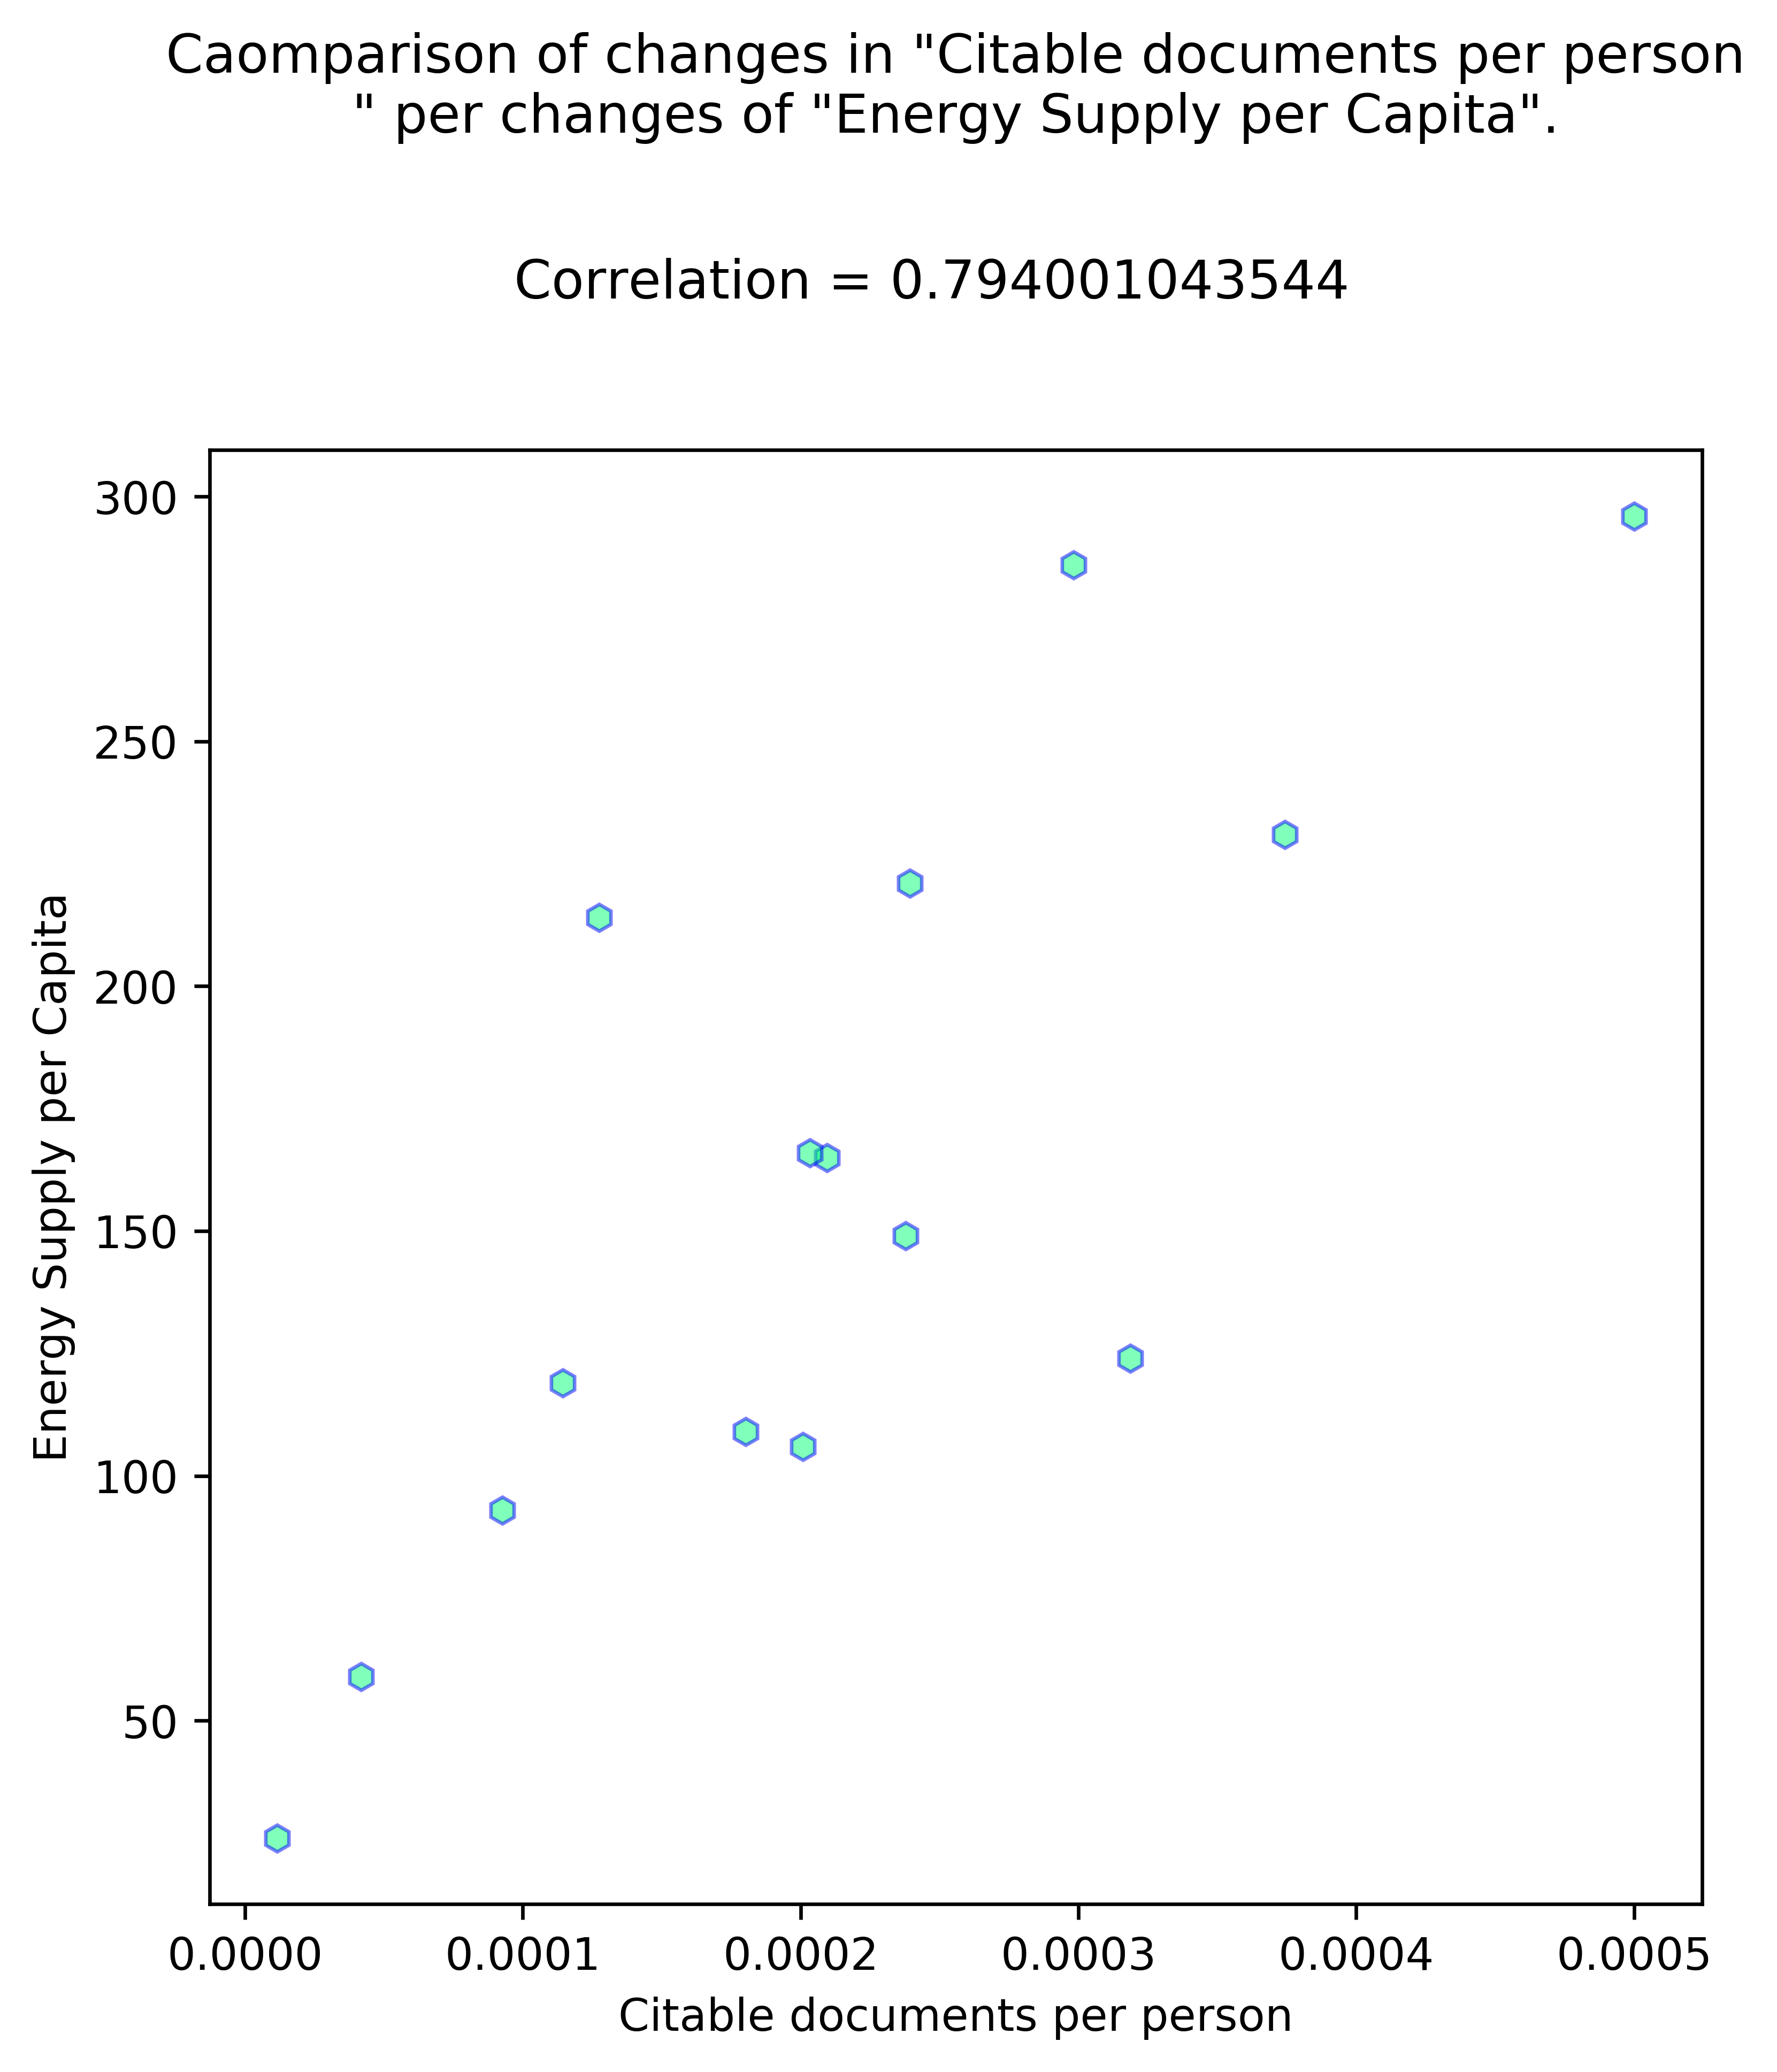

In [243]:
def cite2head_corr(data, col_name, div_col_1, div_col_2, corr_col_2, x_label, y_label):
    data[col_name] = data[div_col_1] / data[div_col_2]
    correlation = data[col_name].corr(data[corr_col_2])
    fig = plt.figure(num=None, figsize=(6, 6), dpi=600)
    plt.plot(data[col_name], data[corr_col_2], 'h', alpha=0.5, c='#00FF74', markeredgecolor='blue',
         markeredgewidth=0.8)
    plt.title('Caomparison of changes in "' + col_name + '\n" per changes of "' + corr_col_2 + '".', y=1.2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.suptitle('Correlation = ' + str(correlation))
    return(correlation)

cite2head_corr(full_data, 'Citable documents per person', 'Citable documents', 'Estimated Population',
               'Energy Supply per Capita', 'Citable documents per person', 'Energy Supply per Capita')

--------------------------------------------------------

# Q9

- Creating the function <i>median_comp</i> which finds the median of the given column and sets 1 for the records which are equal or above the median and 0 for the rest in a new column named by the name passed to it.
- Returns a series of the newly created column.

In [244]:
def median_comp(data, column_source, column_target):
    med = data[column_source].median()
    data[column_target] = 0
    data.loc[data[column_source] >= med, column_target] = 1
    return(data[column_target])

median_comp(full_data, '% Renewable', 'HighRenew')
#isinstance(median_comp(full_data, '% Renewable', 'HighRenew'), pd.Series)

Country
United States         0
China                 1
Japan                 0
Germany               1
France                1
United Kingdom        0
Brazil                1
Italy                 1
India                 0
Canada                1
Russian Federation    1
Spain                 1
Australia             0
South Korea           0
Iran                  0
Name: HighRenew, dtype: int64

--------------------------------------------------------

# Q10

- Creating the function <i>stats2continent</i> which groups the dataframe given to it by the passed criteria and calculates the mean, sum, standard deviation, and count of the column sent to it.
- Returns a dataframe with group names and index and calculation results as observations with calculation type as column labels.

In [245]:
def stats2continent(data, col_name, criteria):
    grouped = data[col_name].groupby(criteria)
    return(pd.DataFrame.from_dict({'Mean': grouped.mean(), 'Sum': grouped.sum(), 'Count': grouped.count(), 'Standard Deviation': grouped.std()}))
                                  
ContinentDict  = {'China':'Asia', 
                   'United States':'North America', 
                   'Japan':'Asia', 
                   'United Kingdom':'Europe', 
                   'Russian Federation':'Europe', 
                   'Canada':'North America', 
                   'Germany':'Europe', 
                   'India':'Asia',
                   'France':'Europe', 
                   'South Korea':'Asia', 
                   'Italy':'Europe', 
                   'Spain':'Europe', 
                   'Iran':'Asia',
                   'Australia':'Australia', 
                   'Brazil':'South America'}

stats2continent(full_data, 'Estimated Population', ContinentDict)

,Count,Mean,Standard Deviation,Sum
Asia,5,5.797333e+08,6.790979e+08,2.898666e+09
Australia,1,2.331602e+07,NaN,2.331602e+07
Europe,6,7.632161e+07,3.464767e+07,4.579297e+08
North America,2,1.764276e+08,1.996696e+08,3.528552e+08
South America,1,2.059153e+08,NaN,2.059153e+08


--------------------------------------------------------

# Q11

- Creating the function <i>groups_viewer</i> which detrmines the bin to which the values of the passed column belong. The number of bins is aquired from the user.
- Returns a series of the groups, the bin ranges and the number of observations in each bin.

In [246]:
def groups_viewer(data, col_name, group_criteria):
    data[col_name +' Bins'] = pd.cut(data[col_name], group_criteria)
    var = data.groupby([ContinentDict, col_name +' Bins']).size()
    return(var)

groups_viewer(full_data, '% Renewable', 5)
#isinstance(groups_viewer(full_data, '% Renewable', 5), pd.Series)

               % Renewable Bins
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

--------------------------------------------------------

# Q12

- Creating the function <i>thousands_marker</i> which places thousand markers in the values of the given column.
- Returns a series of the column with the new format.

In [247]:
def thousands_marker(data, col_name):
    PopEst = data[col_name].astype(float).map("{:,.30f}".format)
    return(PopEst)

thousands_marker(full_data, 'Estimated Population')

Country
United States           317,615,384.615384638309478759765625000000
China                 1,367,645,161.290322542190551757812500000000
Japan                   127,409,395.973154366016387939453125000000
Germany                  80,369,696.969696968793869018554687500000
France                   63,837,349.397590361535549163818359375000
United Kingdom           63,870,967.741935484111309051513671875000
Brazil                  205,915,254.237288147211074829101562500000
Italy                    59,908,256.880733944475650787353515625000
India                 1,276,730,769.230769157409667968750000000000
Canada                   35,239,864.864864863455295562744140625000
Russian Federation      143,500,000.000000000000000000000000000000
Spain                    46,443,396.226415097713470458984375000000
Australia                23,316,017.316017314791679382324218750000
South Korea              49,805,429.864253394305706024169921875000
Iran                     77,075,630.252100840210914611

--------------------------------------------------------